<a href="https://colab.research.google.com/github/dawg-at-irya/bootstrap/blob/main/bootstrap_hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#An example of using bootstrap for hypothesis testing
### The following data are absolute magnitudes in the Ks-band for globular clusters in the Milky Way and M31. Are the two samples drawn from distributions with the same mean?

##### The $Z$ test is one way to answer this question. However, it assumes that the two samples are drawn from Gaussian distributions. A bootstrap implementation does not make any such assumptions. Let's illustrate this.

In [4]:
import numpy as np
#Our data set consists of the Ks luminosity functions for Milky Way and M31 globular clusters.
data1 = np.loadtxt('https://www.irya.unam.mx/gente/s.srinivasan/Teaching/Statistics2023/python/datasets/globular_clusters/MW_GCs.txt')
data2 = np.loadtxt('https://www.irya.unam.mx/gente/s.srinivasan/Teaching/Statistics2023/python/datasets/globular_clusters/M31_GCs.txt')
n_MW = len(data1)
n_M31 = len(data2)
print(f"Number of MW and M31 clusters: {n_MW} and {n_M31} respectively")
#M31 magnitudes not corrected for distance!
data2 = data2 - 24.9


Number of MW and M31 clusters: 82 and 360 respectively


### Setup for the solution<br><br>
##### Null hypothesis: the two population means are equal.<br>
Alternate hypothesis: the two population means are unequal (two-tailed).<br>
Test statistic: difference in sample means between subsamples generated from the bootstrap procedure (explained below).<br><br>

### The intuition behind using bootstrap for this problem is as follows: if the samples are drawn from distributions with the same mean, then if we mix the samples together and then split them into two random pieces, the population means of these two subsamples should be equal.<br><br>

### We will perform the bootstrap as follows:<br>
##### 1.   Compute the sample means of the MW and M31 samples, and compute the difference between these sample means. This difference is the *observed value of the test statistic*.
##### 2.   Combine the two samples into a sample of size n_MW + n_M31
##### 3.   Draw B bootstrap samples from this combined sample
##### 4.   Split each bootstrap sample into two random subsamples
##### 5.   Compute the sample means for each subsample
##### 6.   Compute the difference between these sample means. This is our test statistic.
##### 7.   Find out what percent of the B test statistics are "more extreme" than the observed test statistic. If this fraction is greater than 5% (the typical threshold for hypothesis testing), we reject the null hypothesis.



In [16]:
test_statistic_obs = data1.mean() - data2.mean()
print(f"Observed value of the test statistic: {np.round(test_statistic_obs, 4)}")

Observed value of the test statistic: 0.0402


In [30]:
B = 10000
data = np.append(data1, data2)
data_boot = np.random.choice(data, size=(n_MW + n_M31, B))
splits = np.random.choice(n_MW + n_M31, size=B)
splits[splits == 0] = 1
test_statistic = np.array([data_boot[:s].mean() - data_boot[s:].mean() for s in splits])

In [51]:
# Checking if the test statistic values from bootstrap resampling are "more extreme"
#   than the observed value; if so, what is the fraction of such cases?
# "More extreme" means the absolute value has to be greater than the absolute value of
#   the observed value
frac = len(np.nonzero(np.abs(test_statistic) > np.abs(test_statistic_obs))[0])

In [49]:
if frac >= 0.05:
  print(f"The test statistic exceeds the observed value in more than 5% of the bootstrap resamples. Null hypothesis rejected!")
else:
  print(f"The test statistic exceeds the observed value in fewer than 5% of the bootstrap resamples. Null hypothesis cannot be rejected!")

The test statistic exceeds the observed value in fewer than 5% of the bootstrap resamples. Null hypothesis cannot be rejected!


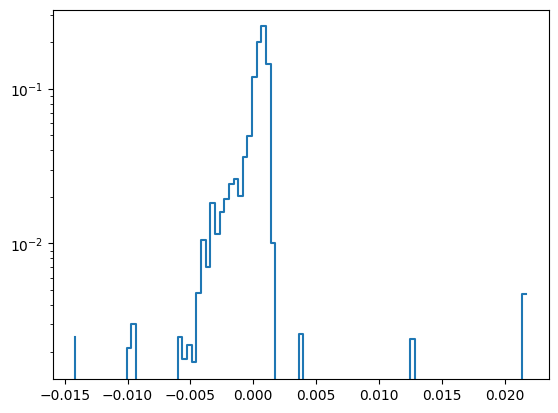

In [50]:
import matplotlib.pyplot as plt
bins, edges = np.histogram(test_statistic, bins='scott')
# _ = plt.hist(test_statistic, histtype='step', density=True, bins='scott')
plt.step(edges[:-1], bins/np.sum(bins))
plt.yscale('log')